# Data Analysis

## Load

In [56]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import BDay
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
factors = pd.read_pickle("FactorData/factors.pkl")
returns = pd.read_pickle("FactorData/returns.pkl")
spy = pd.read_pickle("FactorData/spy.pkl")
fwd_rtn = spy.pct_change().shift(-1)

## Pre-process Data
In a data_analysis.ipynb notebook create a sklearn pipeline (similar to the one shown in class) that preprocesses your data as described in the paper. If needed add any imputers or scalers in your pipeline. Split the data in Training set (until Jan 2015) and test set (anything after that). Don’t look at the test set until you have trained all your models on the training set and you are ready to give predictions for today’s market.

In [3]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [4]:
class DataFrameConverter(BaseEstimator, TransformerMixin):
    def __init__(self, ffill_attr):
        self.ffill_attr = ffill_attr
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_ = X.copy()
        X_.loc[:,self.ffill_attr] = X_.loc[:,self.ffill_attr].ffill()
        return X_.values

In [5]:
ffill_attr = ['DP', 'PE', 'BM', 'CAPE', 'PCA_price', 'DEF', 'CAY', 'BDI', 'NOS', 'CPI']
process_pipeline = Pipeline([
        ("df_converter", DataFrameConverter(ffill_attr)),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()), # a stransformer which scales the variables 
    ])


In [6]:
start_date = pd.to_datetime("1990-06-08")
split_date = pd.to_datetime("2015-01-01")
train_period = 2500

In [7]:
factors_train, factors_test = factors.loc[start_date:split_date], factors.loc[split_date - BDay(train_period):]
returns_train, returns_test = returns.loc[start_date:split_date], returns.loc[split_date - BDay(train_period):]

In [8]:
returns_test = returns_test.dropna()
factors_test = factors_test.reindex(returns_test.index)

In [9]:
columns = factors_train.columns

In [10]:
X_train = process_pipeline.fit_transform(factors_train)
X_test = process_pipeline.transform(factors_test)

## Replicate Paper

### Table 1

In [11]:
df_table1 = pd.DataFrame(index=columns, columns = ["nobs","Min","25th","Mean","Median","75th",
                                                   "Max", "Stdev", "Skewness", "Kurtosis"])

df_table1["nobs"] = factors_train.count()
df_table1["Min"] = factors_train.min()
df_table1["25th"] = factors_train.quantile(.25)
df_table1["Mean"] = factors_train.mean()
df_table1["Median"] = factors_train.median()
df_table1["75th"] = factors_train.quantile(.75)
df_table1["Max"] = factors_train.max()
df_table1["Stdev"] = factors_train.std()
df_table1["Skewness"] = factors_train.skew()
df_table1["Kurtosis"] = factors_train.kurtosis()

In [12]:
df_table1

,nobs,Min,25th,Mean,Median,75th,Max,Stdev,Skewness,Kurtosis
DP,295,0.011100,0.016600,2.069898e-02,0.019400,0.023900,0.038800,0.006166,0.755111,-0.069159
PE,295,13.500000,17.730000,2.271224e+01,20.140000,27.050000,40.000000,6.929086,1.087669,0.386259
BM,61,0.197628,0.343643,3.844230e-01,0.367647,0.450450,0.561798,0.082411,-0.144891,0.001605
CAPE,295,13.320000,20.590000,2.545831e+01,24.640000,27.300000,44.190000,6.797329,1.099678,0.791730
PCA_price,181,-10.507126,-5.551861,-3.187137e-15,-3.559055,5.425447,17.449916,7.894591,0.877649,-0.464289
BY,6410,0.553582,0.916392,9.748131e-01,0.973668,1.037657,1.390608,0.100300,-0.075763,1.346427
DEF,295,0.550000,0.690000,9.551864e-01,0.860000,1.065000,3.380000,0.415323,3.133290,12.953020
TERM,6410,-0.950000,0.892500,1.864055e+00,2.010000,2.800000,3.870000,1.170516,-0.285971,-1.012166
CAY,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIM,6410,0.000000,0.215385,4.681267e-01,0.469231,0.715385,0.953846,0.288225,0.020385,-1.216134


### Table 2

In [13]:
df_table2 = factors_train.ffill().corr()
df_table2

,DP,PE,BM,CAPE,PCA_price,BY,DEF,TERM,CAY,SIM,VRP,IC,BDI,NOS,CPI,PCR,MA,PCA_tech,OIL,SI
DP,1.000000,-0.225441,0.814330,-0.804289,-0.032766,-0.096885,0.291498,0.371232,NaN,-0.038292,-0.130632,0.298097,0.053178,-0.172632,0.176003,-0.669667,0.010782,NaN,-0.132225,-0.098548
PE,-0.225441,1.000000,-0.224905,0.320942,0.992087,-0.090040,0.402662,0.144269,NaN,0.029469,0.489686,-0.051730,0.083105,-0.489149,-0.422234,0.347971,-0.345315,NaN,-0.094668,0.055404
BM,0.814330,-0.224905,1.000000,-0.896456,-0.333004,-0.192557,0.467578,0.459143,NaN,-0.067916,-0.009020,0.716052,0.075822,-0.056042,-0.428745,-0.301852,0.094724,NaN,-0.191133,-0.044638
CAPE,-0.804289,0.320942,-0.896456,1.000000,0.230168,0.159251,-0.407124,-0.563154,NaN,0.040011,0.138584,-0.582334,-0.045690,0.005224,-0.045060,0.738708,0.100005,NaN,0.134654,0.054838
PCA_price,-0.032766,0.992087,-0.333004,0.230168,1.000000,-0.050126,0.388658,0.178497,NaN,0.024119,0.444316,-0.099175,0.088128,-0.549447,-0.303911,0.187709,-0.463579,NaN,-0.052397,0.056510
BY,-0.096885,-0.090040,-0.192557,0.159251,-0.050126,1.000000,-0.337784,0.094800,NaN,0.155324,-0.391407,-0.458909,0.124613,0.078060,0.011280,0.078345,0.289973,NaN,0.350437,-0.124400
DEF,0.291498,0.402662,0.467578,-0.407124,0.388658,-0.337784,1.000000,0.252335,NaN,-0.026792,0.523391,0.276547,0.105430,-0.221991,-0.256644,-0.178744,-0.440343,NaN,-0.298295,-0.010037
TERM,0.371232,0.144269,0.459143,-0.563154,0.178497,0.094800,0.252335,1.000000,NaN,0.061492,-0.040468,0.447560,0.038815,-0.185604,-0.240720,-0.252670,-0.079140,NaN,-0.002363,-0.114601
CAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIM,-0.038292,0.029469,-0.067916,0.040011,0.024119,0.155324,-0.026792,0.061492,NaN,1.000000,-0.141403,-0.149477,-0.086290,-0.057259,-0.004478,0.013060,0.085942,NaN,0.147617,-0.061839


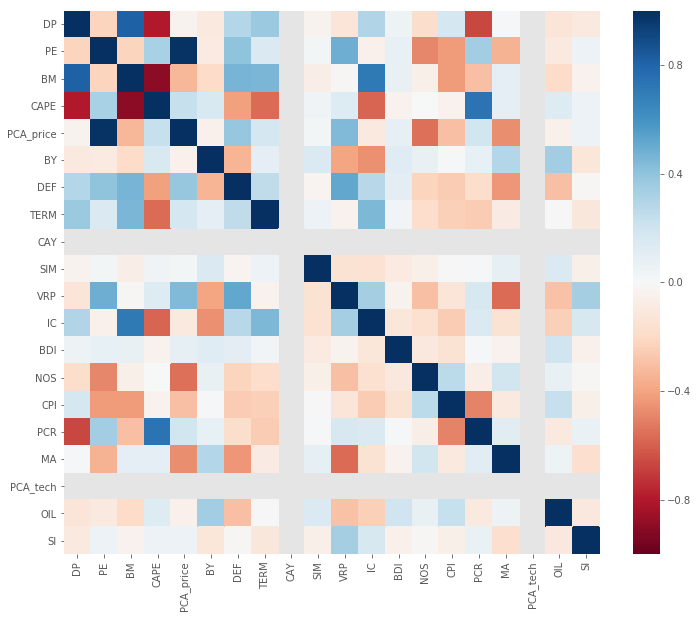

In [73]:
fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_table2,cmap="RdBu",vmax=1,vmin=-1,ax=ax)
plt.show()

### Table 3

In [14]:
df_table3 = pd.concat([factors_train.ffill().corrwith(returns_train.loc[:,col]) for col in returns_train.columns],axis=1)
df_table3.columns = returns_train.columns
df_table3

,R_1M,R_3M,R_6M,R_12M,R_130d
DP,0.073382,0.156998,0.250089,0.328279,0.257908
PE,-0.108471,-0.188695,-0.211539,-0.254527,-0.216836
BM,0.168664,0.285553,0.387804,0.525976,0.401612
CAPE,-0.034530,-0.098800,-0.170917,-0.272392,-0.181144
PCA_price,-0.131487,-0.210527,-0.220353,-0.274077,-0.225894
BY,-0.036720,-0.031538,-0.035520,0.038746,-0.032295
DEF,-0.066083,-0.093084,-0.048472,0.013682,-0.044384
TERM,-0.033889,-0.057806,-0.047637,0.061618,-0.042330
CAY,NaN,NaN,NaN,NaN,NaN
SIM,-0.034494,-0.118469,-0.152640,-0.009805,-0.144306


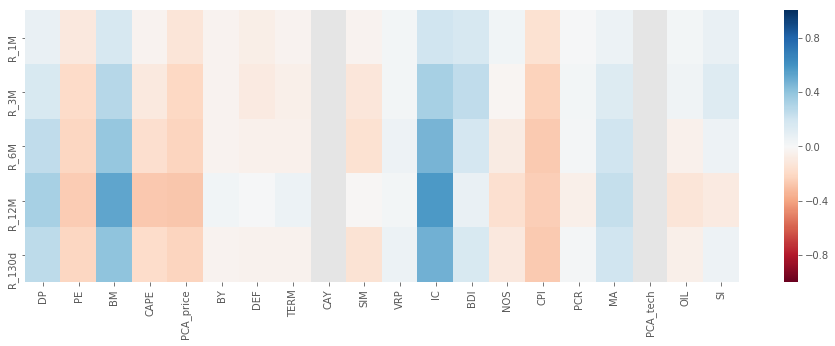

In [67]:
fig,ax = plt.subplots(figsize=(16,5))
sns.heatmap(df_table3.T,cmap="RdBu",vmax=1,vmin=-1,ax=ax)
plt.show()

## Predictor Classes For Each Model

As shown in class you can extend the Predictor classes by implementing, fit(), transform() and predict methods. The linear regression is already implemented in Sklearn, but the Correlation Screened Regression, and Real-Time Correlation Screening Regression are not. Implement them in a class. Finally, add an elastic net linear model.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
y = returns_train.R_130d.dropna()
idx = y.index
X = factors_train.reindex(idx)

In [17]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [18]:
#split = len(idx)*2//3
#train = idx[:split]
#test = idx[split:]
#X_train, X_test, y_train, y_test = X.loc[train], X.loc[test], y.loc[train], y.loc[test]

In [19]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [20]:
def walk_forward_split(X, y, train_period=2500, freq=20):
    X = X.copy(deep=True)
    X.loc[:,ffill_attr] = X.loc[:,ffill_attr].ffill()
    
    idx = y.index
    iidx = np.arange(len(idx))
    trade_iidxs = [chunk for chunk in list(chunks(iidx,freq)) if chunk[0]>=train_period]
    
    train_idxs = [idx[iidxs[0]-train_period:iidxs[0]] for iidxs in trade_iidxs]
    
    Xs_train = [X.loc[train_idx] for train_idx in train_idxs]
    ys_train = [y.loc[train_idx] for train_idx in train_idxs]
    Xs_trade = [X.iloc[trade_iidx] for trade_iidx in trade_iidxs]
    ys_trade = [y.iloc[trade_iidx] for trade_iidx in trade_iidxs]
    
    return Xs_train, ys_train, Xs_trade, ys_trade

In [21]:
class WalkForwardRegression():
    def __init__(self, regressor, train_period=2500, freq=20):
        self.regressor = regressor
        self.train_period=2500
        self.freq=20
        
    def walk_forward_predict(self, X, y):
        Xs_train, ys_train, Xs_trade, ys_trade = walk_forward_split(X, y, self.train_period, self.freq)
        ys_pred = [pd.Series(self.fit(X_train,y_train).predict(X_trade),index = y_trade.index)\
                               for X_train, y_train, X_trade, y_trade in \
                                   zip(Xs_train, ys_train, Xs_trade, ys_trade)]
        return pd.concat(ys_pred)
        
    def fit(self, X, y):
        return self.regressor.fit(X, y)
        
    def predict(self, X):
        return self.regressor.predict(X)

In [22]:
        X = X.copy(deep=True)
        X_ewma = X.ewm(halflife=20).mean()
        X_diff = X - X_ewma

In [23]:
corr = pd.concat([X.corrwith(y).abs(), X_ewma.corrwith(y).abs(), X_diff.corrwith(y).abs()],axis=1)


In [24]:
class FeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, ffill_attr):
        self.ffill_attr = ffill_attr
        self.selected_transformation = None
    def fit(self, X, y):
        X = X.copy(deep=True)
        X.loc[:,self.ffill_attr] = X.loc[:,self.ffill_attr].ffill()
        X_ewma = X.ewm(halflife=20).mean()
        X_diff = X - X_ewma
        corr = pd.concat([X.corrwith(y).abs(), X_ewma.corrwith(y).abs(), X_diff.corrwith(y).abs()],axis=1)
        trans = corr.apply(lambda x: x.idxmax(),axis=1)
        trans[trans.isna()]=-1
        self.selected_transformation = trans.astype("int")        

        return self
    def transform(self, X):
        X = X.copy(deep=True)
        X_ewma = X.ewm(halflife=20).mean()
        X_diff = X - X_ewma
        for col in X.columns:
            if self.selected_transformation[col] < 0.5:
                pass
            elif self.selected_transformation[col] == 1:
                X.loc[:,col] = X_ewma.loc[:,col]
            elif self.selected_transformation[col] == 2:
                X.loc[:,col] = X_diff.loc[:,col]
        return X

### Linear Regression (Kitchen Sink Regression)

$$ R_{130d} = \alpha + \beta_{KS}' x + \epsilon$$

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
class FeatureSelector_ks(BaseEstimator, TransformerMixin):
    def __init__(self, ffill_attr):
        self.ffill_attr = ffill_attr
        self.selected_feature = None
    def fit(self, X, y=None):
        selected = (X.ffill().count()/X.shape[0]>0.5)
        if selected["PCA_price"]:
            selected[ 'DP', 'PE', 'BM', 'CAPE'] = False
        self.selected_feature = selected.index[selected]
            
        return self
    def transform(self, X):
        X_ = X.copy()
        X_.loc[:,self.ffill_attr] = X_.loc[:,self.ffill_attr].ffill()
        return X_.loc[:,self.selected_feature].values

In [27]:
def KitchenSinkRegression():
    return Pipeline([
                     ("feature_transformer",FeatureTransformer(ffill_attr)),
                     ("feature_selector", FeatureSelector_ks(ffill_attr)),
                     ('imputer', SimpleImputer(strategy="median")),
                     ('std_scaler', StandardScaler()),
                     ("lin_reg", LinearRegression())])

In [28]:
ks_regression = KitchenSinkRegression()
wfr_ks = WalkForwardRegression(ks_regression, train_period=2500, freq=20)
pred_ks = wfr_ks.walk_forward_predict(X,y)

### Correlation Screened Regression

$$ R_{130d} = \alpha + \beta_{CS}' \hat{x} + \epsilon$$

$$\hat{x_i} = \mathbb{1}_{corr(x_i,y)>0.1} x_i$$

In [29]:
class FeatureSelector_cs(BaseEstimator, TransformerMixin):
    def __init__(self, ffill_attr, threshold = 0.1):
        self.ffill_attr = ffill_attr
        self.threshold = threshold
        self.selected_feature = None
    def fit(self, X, y):
        X = X.copy(deep=True)
        #X_ewma = X.ewm(halflife=20).mean()
        #X_diff = X - X_ewma
        
        selected = (X.ffill().count()/X.shape[0]>0.5)
        if selected["PCA_price"]:
            selected[ 'DP', 'PE', 'BM', 'CAPE'] = False
        
        selected = (X.corrwith(y).abs()>self.threshold) & selected
        self.selected_feature = selected.index[selected]
        return self
    def transform(self, X):
        
        X_ = X.copy()
        X_.loc[:,self.ffill_attr] = X_.loc[:,self.ffill_attr].ffill()
        return X_.loc[:,self.selected_feature].values

In [30]:
def CorrelationScreenedRegression(screening_threshold):
    return Pipeline([("feature_transformer",FeatureTransformer(ffill_attr)),
                     ("feature_selector", FeatureSelector_cs(ffill_attr,screening_threshold)),
                     ('imputer', SimpleImputer(strategy="median")),
                     ('std_scaler', StandardScaler()),
                     ("lin_reg", LinearRegression())])
    

In [31]:
cs_regression =CorrelationScreenedRegression(screening_threshold=0.1)
wfr_cs = WalkForwardRegression(cs_regression, train_period=2500, freq=20)
pred_cs = wfr_cs.walk_forward_predict(X,y)

### Real-Time Correlation Screening Regression

$$ R_{130d} = \alpha + \beta_{RTCS}' \hat{x} + \epsilon$$

$$\hat{x_{i,t}} = \mathbb{1}_{\{corr(x_i,y)>0.1, discoverd_i <t \}} x_{i,t}$$

In [32]:
discover_time = {"BDI":pd.to_datetime("2011-01-01"),
                 "NOS":pd.to_datetime("2008-12-01"),
                 "OIL":pd.to_datetime("2005-01-01"),
                 "PCR":pd.to_datetime("2014-12-01"),
                 "PCA_tech":pd.to_datetime("2010-01-01"),}

In [78]:
pd.DataFrame(pd.Series(discover_time,name="Discovered At"))

,Discovered At
BDI,2011-01-01
NOS,2008-12-01
OIL,2005-01-01
PCR,2014-12-01
PCA_tech,2010-01-01


In [33]:
class FeatureSelector_rtcs(BaseEstimator, TransformerMixin):
    def __init__(self, ffill_attr, threshold = 0.1):
        self.ffill_attr = ffill_attr
        self.threshold = threshold
        self.selected_feature = None
    def fit(self, X, y):
        X = X.copy(deep=True)
        for fac in discover_time:
            X.loc[:discover_time[fac],fac] = np.nan
        
        selected = (X.ffill().count()/X.shape[0]>0.5)
        if selected["PCA_price"]:
            selected[ 'DP', 'PE', 'BM', 'CAPE'] = False
        
        selected = (X.corrwith(y).abs()>self.threshold) & selected
        self.selected_feature = selected.index[selected]
        return self
    def transform(self, X):
        X = X.copy(deep=True)
        for fac in discover_time:
            X.loc[:discover_time[fac],fac] = np.nan
        
        X.loc[:,self.ffill_attr] = X.loc[:,self.ffill_attr].ffill()
        return X.loc[:,self.selected_feature].values

In [34]:
def RealTimeCorrelationScreeningRegression(screening_threshold):
    return Pipeline([("feature_transformer",FeatureTransformer(ffill_attr)),
                     ("feature_selector", FeatureSelector_rtcs(ffill_attr,screening_threshold)),
                     ('imputer', SimpleImputer(strategy="median")),
                     ('std_scaler', StandardScaler()),
                     ("lin_reg", LinearRegression())])

In [35]:
rtcs_regression = RealTimeCorrelationScreeningRegression(screening_threshold=0.1)
wfr_rtcs = WalkForwardRegression(rtcs_regression, train_period=2500, freq=20)
pred_rtcs = wfr_rtcs.walk_forward_predict(X,y)

### Elastic Net Linear Model
$$ R_{130d} = \beta_0 + \beta_{elastic}' x + \epsilon$$

$$[\beta_0 ,\beta_{ElasticNet}] = argmax_{w}( \frac{\|R_{130d} - X w\|_2}{2 n_{sample}} + \alpha \rho \| w \|_1 + \frac{\alpha (1-\rho )}{2}\| w \|_2 )$$

In [36]:
from sklearn.linear_model import ElasticNet

In [37]:
def ElasticNetRegression(l1_ratio=0.01,alpha=0.1):
    return Pipeline([("feature_transformer",FeatureTransformer(ffill_attr)),
                     ("feature_selector", FeatureSelector_ks(ffill_attr)),
                     ('imputer', SimpleImputer(strategy="median")),
                     ('std_scaler', StandardScaler()),
                     ("elastic_net", ElasticNet(l1_ratio=l1_ratio,alpha=alpha))])

In [38]:
en_regression = ElasticNetRegression(l1_ratio=0.01,alpha=0.1)
wfr_en = WalkForwardRegression(en_regression, train_period=2500, freq=20)
pred_en = wfr_en.walk_forward_predict(X,y)

## Backtest

$$Position = max(min(8\times R_{pred},-0.5),1.5)$$

In [39]:
from pandas.tseries.offsets import BDay
import backtester as bt

In [40]:
def pred2pos(pred):
    pos = pred.rename("SPY") * 8.
    pos[pos>1.5] = 1.5
    pos[pos<-0.5] = -0.5
    return pos

### Linear Regression (Kitchen Sink Regression)

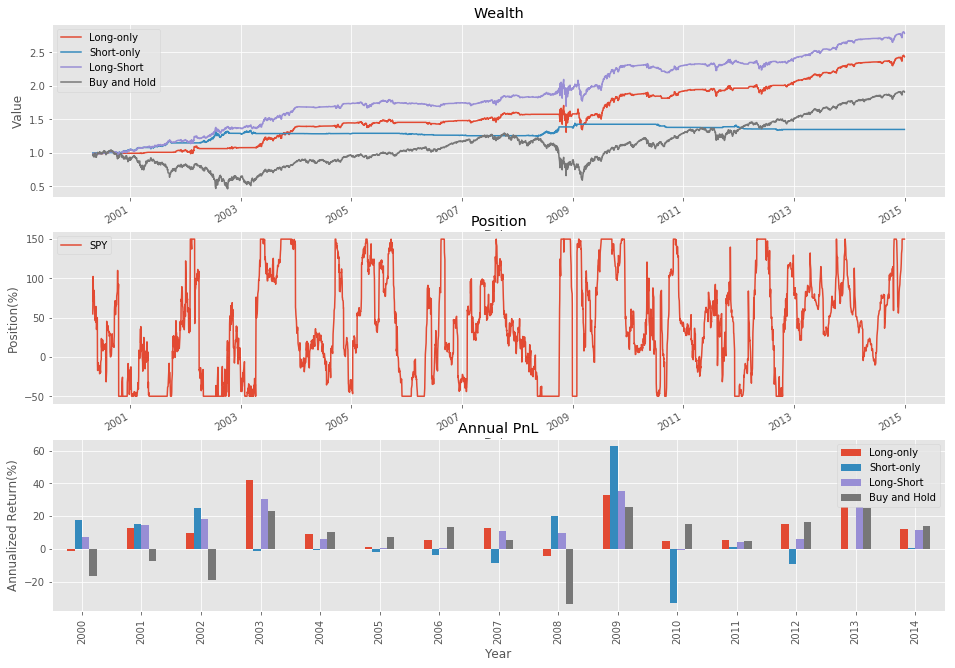

,annualized return,annualized vol,sharp ratio,hit rate,gross leverage,turnover,max drawdown
Long-only,9.79%,17.01%,0.58,55.33%,72.10%,755.50%,23.40%
Short-only,2.40%,4.78%,0.50,48.12%,35.80%,462.13%,7.32%
Long-Short,12.19%,17.66%,0.69,54.09%,61.40%,715.18%,19.06%
Buy and Hold,6.20%,20.26%,0.31,54.43%,100.00%,0.00%,55.51%


In [41]:
pos_ks = pred2pos(pred_ks)
summary_ks = bt.backtest_single_asset(wt_df=pos_ks, fwd_rtn=fwd_rtn, initial_capital=1.)
summary_ks

### Correlation Screened Regression

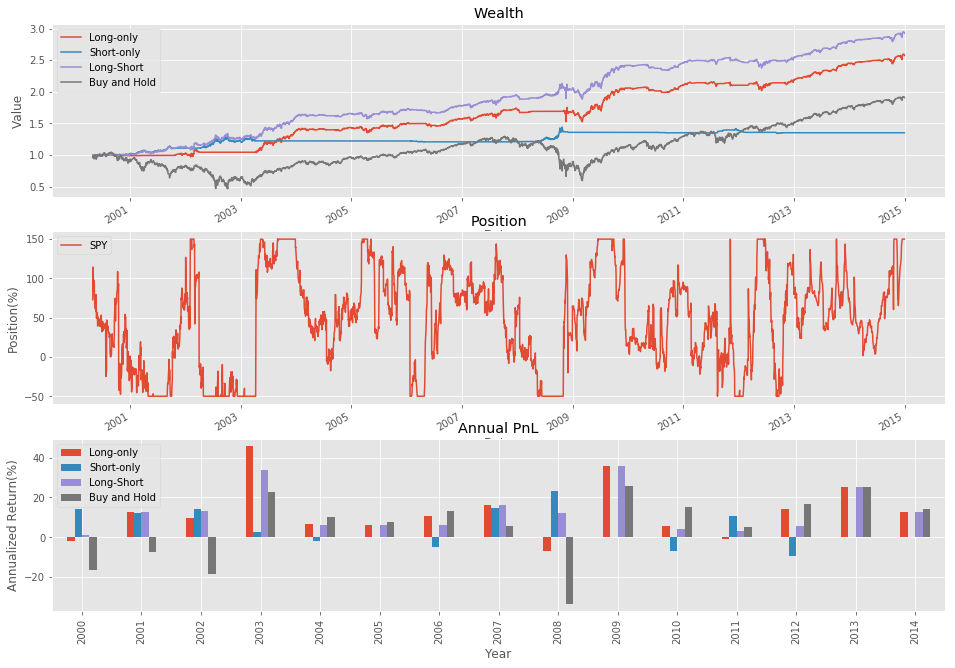

,annualized return,annualized vol,sharp ratio,hit rate,gross leverage,turnover,max drawdown
Long-only,10.74%,12.23%,0.88,56.18%,73.51%,661.06%,12.95%
Short-only,2.40%,5.80%,0.41,49.20%,35.87%,431.96%,7.16%
Long-Short,13.15%,13.53%,0.97,55.19%,63.95%,643.90%,11.68%
Buy and Hold,6.20%,20.26%,0.31,54.43%,100.00%,0.00%,55.51%


In [42]:
pos_cs = pred2pos(pred_cs)
summary_cs = bt.backtest_single_asset(wt_df=pos_cs, fwd_rtn=fwd_rtn, initial_capital=1.)
summary_cs

### Real-Time Correlation Screening Regression

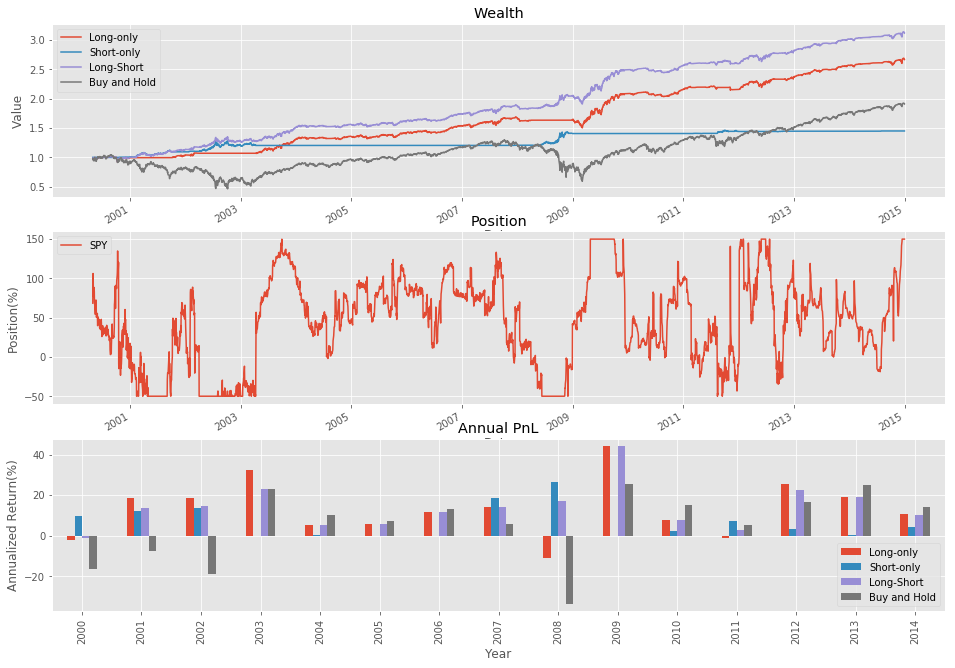

,annualized return,annualized vol,sharp ratio,hit rate,gross leverage,turnover,max drawdown
Long-only,11.37%,10.62%,1.07,56.60%,67.38%,534.16%,11.07%
Short-only,3.07%,6.05%,0.51,50.61%,34.58%,419.68%,7.58%
Long-Short,14.44%,12.22%,1.18,55.80%,59.82%,533.88%,8.80%
Buy and Hold,6.20%,20.26%,0.31,54.43%,100.00%,0.00%,55.51%


In [43]:
pos_rtcs = pred2pos(pred_rtcs)
summary_rtcs = bt.backtest_single_asset(wt_df=pos_rtcs, fwd_rtn=fwd_rtn, initial_capital=1.)
summary_rtcs

### Elastic Net Linear Model

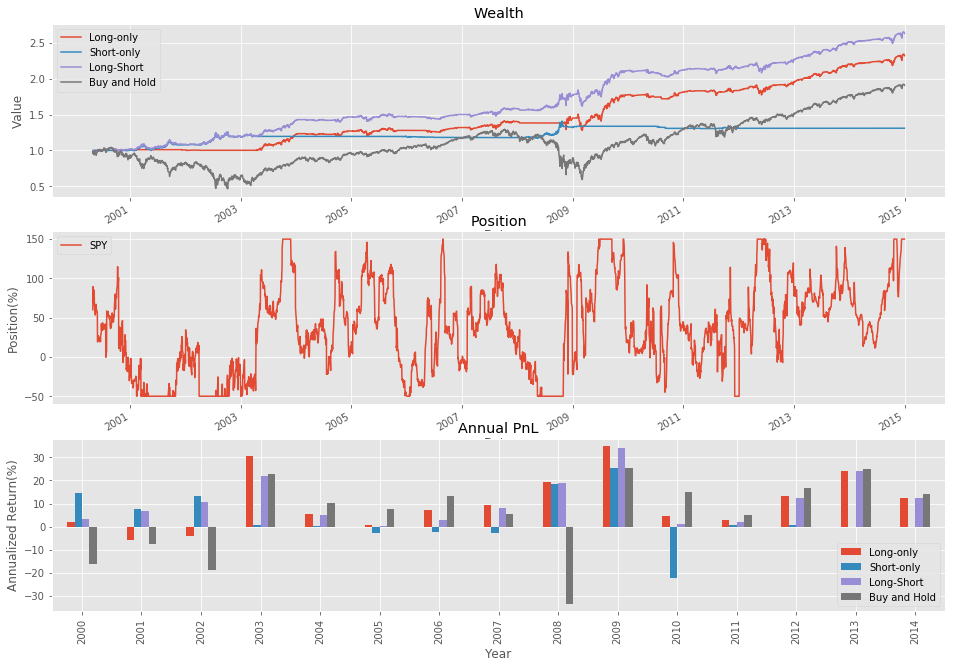

,annualized return,annualized vol,sharp ratio,hit rate,gross leverage,turnover,max drawdown
Long-only,9.02%,10.76%,0.84,56.03%,63.58%,602.35%,14.98%
Short-only,2.12%,5.86%,0.36,49.34%,32.21%,427.41%,7.54%
Long-Short,11.14%,12.24%,0.91,54.91%,54.62%,587.90%,12.24%
Buy and Hold,6.20%,20.26%,0.31,54.43%,100.00%,0.00%,55.51%


In [44]:
pos_en = pred2pos(pred_en)
summary_en = bt.backtest_single_asset(wt_df=pos_en, fwd_rtn=fwd_rtn, initial_capital=1.)
summary_en

## Comparison 

In [45]:
comparison = pd.concat([summary_ks.iloc[2],
                        summary_cs.iloc[2],
                        summary_rtcs.iloc[2],
                        summary_en.iloc[2],
                        summary_cs.iloc[3],],axis=1).T

In [46]:
comparison.index = ["Kitchen Sink Regression",
                    "Correlation Screening Regression",
                    "Real-Time Correlation Screening Regression",
                    "Elastic Net Linear Model",
                    "Buy and Hold"]

In [47]:
comparison

,annualized return,annualized vol,sharp ratio,hit rate,gross leverage,turnover,max drawdown
Kitchen Sink Regression,12.19%,17.66%,0.69,54.09%,61.40%,715.18%,19.06%
Correlation Screening Regression,13.15%,13.53%,0.97,55.19%,63.95%,643.90%,11.68%
Real-Time Correlation Screening Regression,14.44%,12.22%,1.18,55.80%,59.82%,533.88%,8.80%
Elastic Net Linear Model,11.14%,12.24%,0.91,54.91%,54.62%,587.90%,12.24%
Buy and Hold,6.20%,20.26%,0.31,54.43%,100.00%,0.00%,55.51%


## Parameters

In [48]:
def test(Regression, param = {"l1_ratio":0.01,"alpha":0.1},X=X,y=y, plot=False):
    regression = Regression(**param)
    wfr = WalkForwardRegression(regression, train_period=2500, freq=20)
    pred = wfr.walk_forward_predict(X,y)
    pos = pred2pos(pred)
    summary = bt.backtest_single_asset(wt_df=pos, fwd_rtn=fwd_rtn, initial_capital=1., plot=plot)
    res = pd.Series({ p:"%.2f"%param[p] for p in param}).append(summary.iloc[2])
    return res

In [49]:
def display_diff(Regression,params):
    ress = [ test (Regression = CorrelationScreenedRegression, param = p)  for p in params]
    return pd.concat(ress,axis=1).T

### Correlation Screened Regression

In [50]:
params = [{"screening_threshold": th} for th in np.arange(0.02,0.2+1e-6,0.02)]
ress = [ test (Regression = CorrelationScreenedRegression, param = p)  for p in params]
df_cs = pd.concat(ress,axis=1).T
df_cs

,screening_threshold,annualized return,annualized vol,sharp ratio,hit rate,gross leverage,turnover,max drawdown
0,0.02,12.08%,17.68%,0.68,54.08%,61.42%,706.56%,19.21%
1,0.04,12.64%,17.68%,0.71,54.46%,63.46%,704.87%,18.12%
2,0.06,13.22%,17.50%,0.76,54.44%,65.02%,692.64%,17.89%
3,0.08,13.01%,16.00%,0.81,54.51%,64.42%,663.03%,11.32%
4,0.10,13.15%,13.53%,0.97,55.19%,63.95%,643.90%,11.68%
5,0.12,13.18%,12.98%,1.01,54.86%,64.42%,600.46%,10.74%
6,0.14,11.37%,12.61%,0.90,54.74%,62.52%,525.83%,11.52%
7,0.16,11.64%,12.40%,0.94,54.89%,61.79%,482.11%,11.90%
8,0.18,11.76%,12.41%,0.95,54.92%,61.44%,438.51%,11.85%
9,0.20,11.67%,12.57%,0.93,54.91%,62.38%,391.84%,12.58%


### Real-Time Correlation Screening Regression

In [51]:
params = [{"screening_threshold": th} for th in np.arange(0.02,0.2+1e-6,0.02)]
ress = [ test (Regression = RealTimeCorrelationScreeningRegression, param = p)  for p in params]
df_rtcs = pd.concat(ress,axis=1).T
df_rtcs

,screening_threshold,annualized return,annualized vol,sharp ratio,hit rate,gross leverage,turnover,max drawdown
0,0.02,15.52%,12.50%,1.24,56.02%,60.34%,564.21%,8.79%
1,0.04,15.64%,12.40%,1.26,56.17%,60.06%,549.93%,8.79%
2,0.06,15.61%,12.18%,1.28,56.06%,59.07%,561.54%,8.79%
3,0.08,14.98%,12.25%,1.22,55.99%,58.65%,538.04%,8.80%
4,0.10,14.44%,12.22%,1.18,55.80%,59.82%,533.88%,8.80%
5,0.12,13.80%,12.81%,1.08,55.44%,60.43%,504.77%,11.76%
6,0.14,12.85%,12.76%,1.01,55.23%,59.88%,477.19%,12.00%
7,0.16,12.59%,12.67%,0.99,55.19%,59.67%,448.12%,12.02%
8,0.18,12.62%,12.57%,1.00,55.14%,59.39%,406.50%,11.92%
9,0.20,12.05%,12.48%,0.97,55.08%,59.10%,355.16%,12.52%


### Elastic Net Linear Model

In [52]:
params = [{"l1_ratio":x,"alpha":y} for x in np.arange(0.01,0.05+1e-6,0.01) for y in np.arange(0.1,0.5+1e-6,0.1)]
ress = [ test (Regression = ElasticNetRegression, param = p)  for p in params]
df_en = pd.concat(ress,axis=1).T
df_en

,l1_ratio,alpha,annualized return,annualized vol,sharp ratio,hit rate,gross leverage,turnover,max drawdown
0,0.01,0.10,11.14%,12.24%,0.91,54.91%,54.62%,587.90%,12.24%
1,0.01,0.20,10.87%,10.97%,0.99,55.07%,51.87%,509.58%,9.63%
2,0.01,0.30,10.40%,10.57%,0.98,55.20%,49.62%,450.11%,8.79%
3,0.01,0.40,9.84%,10.07%,0.98,55.30%,47.35%,398.00%,8.64%
4,0.01,0.50,9.37%,9.68%,0.97,55.36%,45.62%,352.06%,8.48%
5,0.02,0.10,11.07%,11.63%,0.95,54.91%,53.70%,561.52%,11.60%
6,0.02,0.20,10.57%,10.80%,0.98,55.10%,50.43%,456.18%,9.01%
7,0.02,0.30,9.85%,10.11%,0.97,55.29%,47.47%,377.30%,8.42%
8,0.02,0.40,9.19%,9.62%,0.96,55.35%,45.34%,307.77%,8.18%
9,0.02,0.50,8.68%,9.27%,0.94,55.36%,43.62%,255.01%,9.79%


## Test

In [53]:
y_test = returns_test.R_130d
idx = y_test.index
X_test = factors_test.reindex(idx)

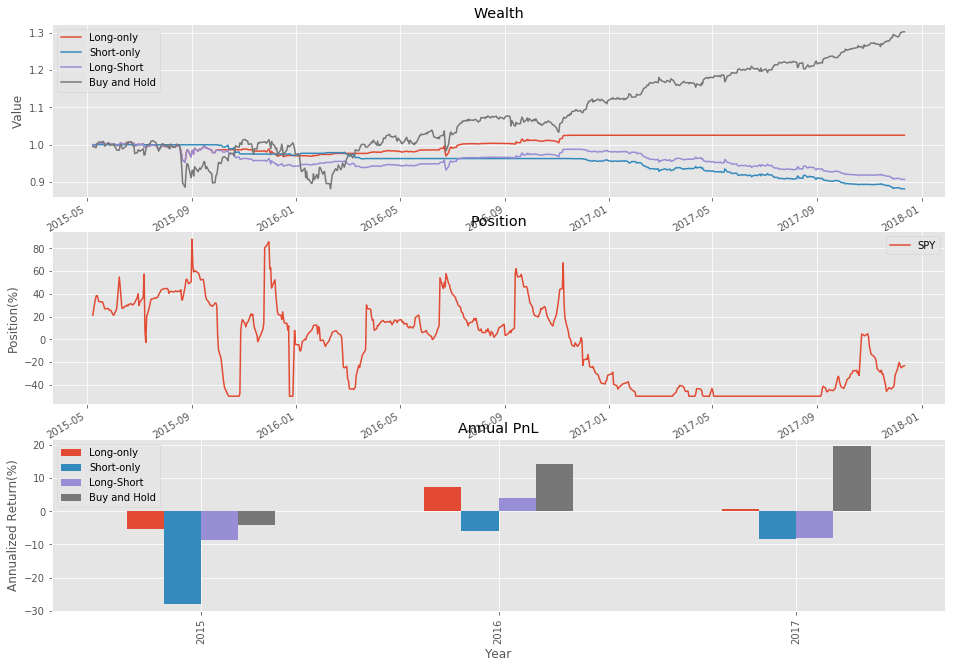

,annualized return,annualized vol,sharp ratio,hit rate,gross leverage,turnover,max drawdown
Long-only,0.97%,3.95%,0.25,52.83%,24.94%,497.54%,5.39%
Short-only,-4.56%,2.29%,-1.99,42.97%,38.60%,226.25%,11.86%
Long-Short,-3.58%,4.57%,-0.78,46.95%,31.61%,397.40%,9.98%
Buy and Hold,11.63%,12.33%,0.94,53.96%,100.00%,0.00%,13.08%


In [79]:
regression = RealTimeCorrelationScreeningRegression(**{"screening_threshold":0.02})
wfr = WalkForwardRegression(regression, train_period=2500, freq=20)
pred = wfr.walk_forward_predict(X_test,y_test)
pos = pred2pos(pred)
summary = bt.backtest_single_asset(wt_df=pos, fwd_rtn=fwd_rtn, initial_capital=1., plot=True)
summary